In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
path = "ToyotaCorolla - MLR.csv"
df = pd.read_csv(path, encoding='latin1')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)


desc = df.describe(include='all').T
desc

Shape: (1436, 11)

Dtypes:
 Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,1436.0,NaN,NaN,NaN,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.0,32500.0
Age_08_04,1436.0,NaN,NaN,NaN,55.947075,18.599988,1.0,44.0,61.0,70.0,80.0
KM,1436.0,NaN,NaN,NaN,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
Fuel_Type,1436,3,Petrol,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,1436.0,NaN,NaN,NaN,101.502089,14.98108,69.0,90.0,110.0,110.0,192.0
Automatic,1436.0,NaN,NaN,NaN,0.05571,0.229441,0.0,0.0,0.0,0.0,1.0
cc,1436.0,NaN,NaN,NaN,1576.85585,424.38677,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1436.0,NaN,NaN,NaN,4.033426,0.952677,2.0,3.0,4.0,5.0,5.0
Cylinders,1436.0,NaN,NaN,NaN,4.0,0.0,4.0,4.0,4.0,4.0,4.0
Gears,1436.0,NaN,NaN,NaN,5.026462,0.18851,3.0,5.0,5.0,5.0,6.0


In [4]:
missing = pd.DataFrame(df.isna().sum(), columns=["missing_count"])
missing["missing_pct"] = missing["missing_count"] / len(df) * 100
missing.sort_values("missing_count", ascending=False)

,missing_count,missing_pct
Price,0,0.0
Age_08_04,0,0.0
KM,0,0.0
Fuel_Type,0,0.0
HP,0,0.0
Automatic,0,0.0
cc,0,0.0
Doors,0,0.0
Cylinders,0,0.0
Gears,0,0.0


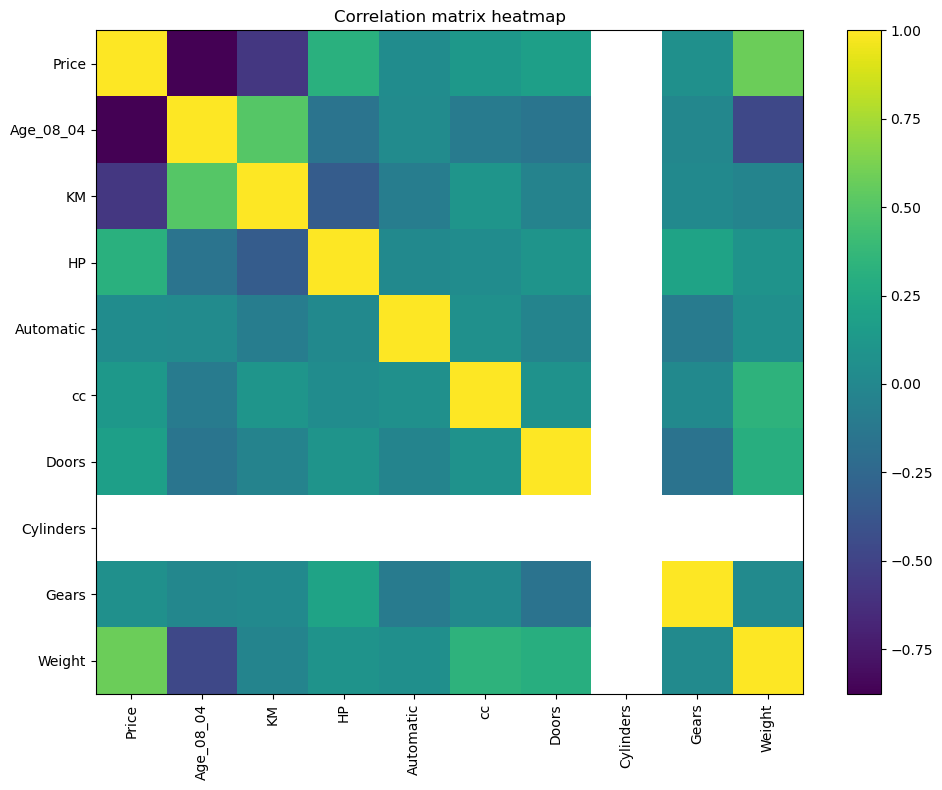

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation matrix heatmap")
plt.tight_layout()
plt.show()

corr

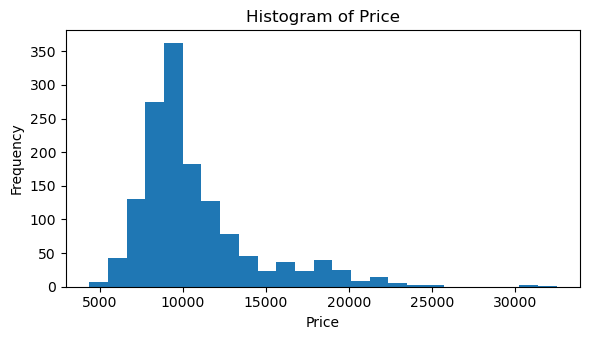

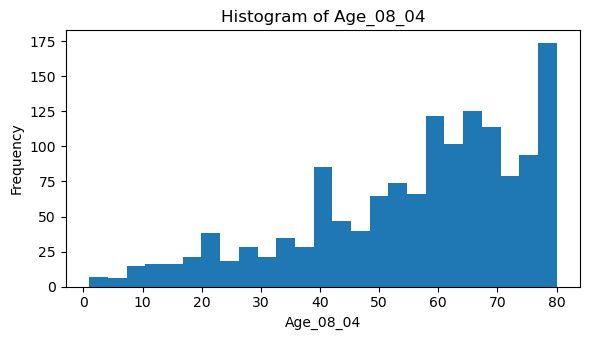

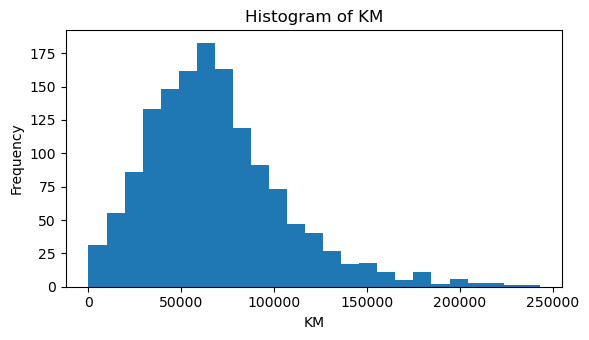

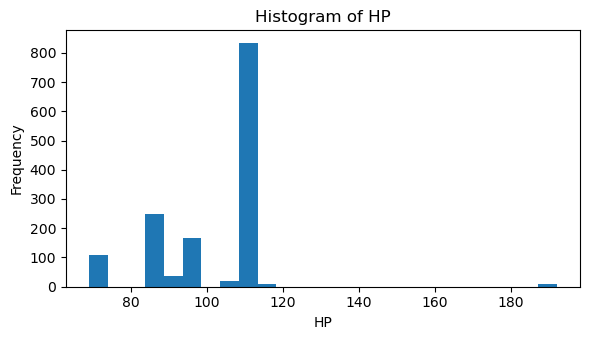

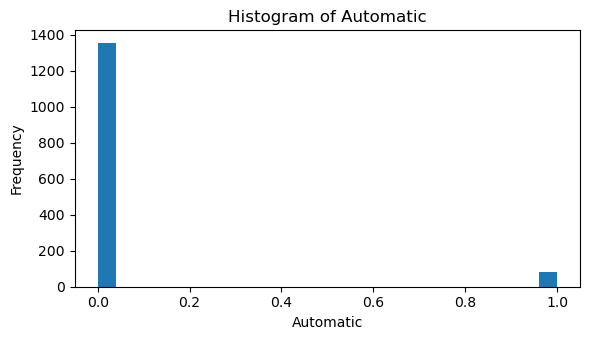

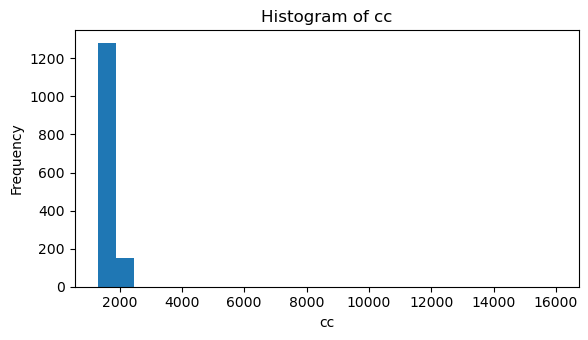

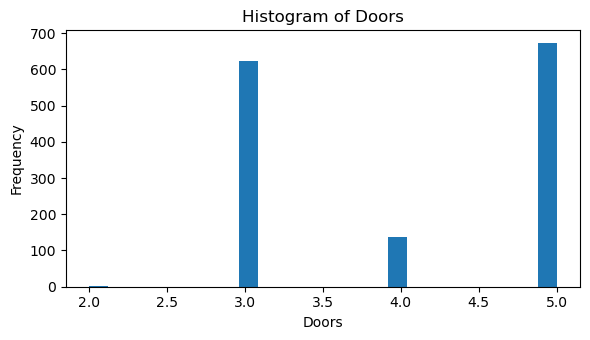

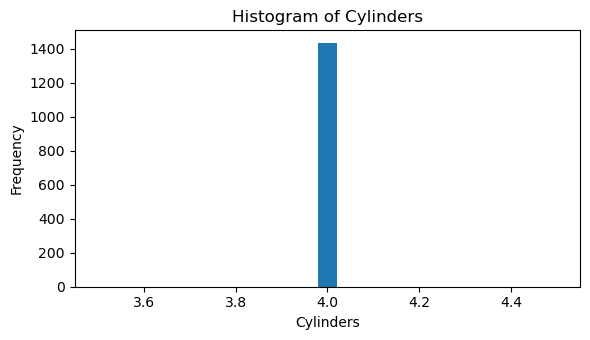

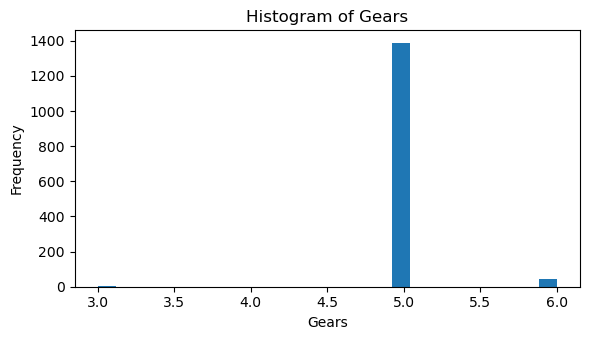

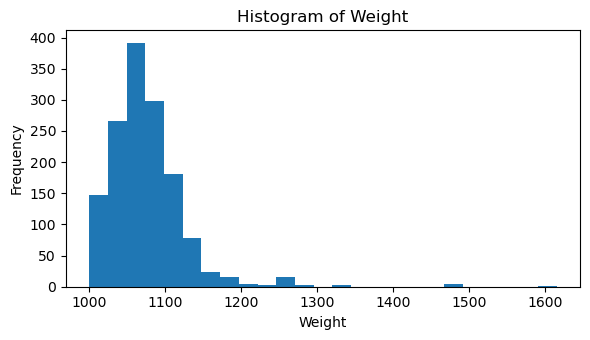

In [6]:
for col in numeric_cols:
    plt.figure(figsize=(6,3.5))
    plt.hist(df[col].dropna(), bins=25)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [7]:
target_candidates = [c for c in df.columns if c.lower() in ('price','price(€)','price_(€)','price_','price_eur','priceeuro')]
if len(target_candidates) == 0:
    possible_target = df.columns[-1]
else:
    possible_target = target_candidates[0]

print("Chosen target column:", possible_target)

Chosen target column: Price


In [8]:
X = df.copy()
for id_col in ['Id','ID','id','index','model','Model']:
    if id_col in X.columns:
        X = X.drop(columns=[id_col])

y = X[possible_target]
X = X.drop(columns=[possible_target])

# Encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Fill missing
X = X.fillna(X.median())
y = y.fillna(y.median())

X.shape, y.shape

((1436, 11), (1436,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Calculate RMSE manually by taking the square root of MSE
# This works with older versions of scikit-learn
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Train R2:", train_r2, "Train RMSE:", train_rmse)
print("Test R2:", test_r2, "Test RMSE:", test_rmse)

Train R2: 0.8702643169608926 Train RMSE: 1303.3396224118349
Test R2: 0.8348888040611082 Test RMSE: 1484.2654153296514


In [11]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": lr.coef_
}).sort_values("coefficient", key=lambda s: s.abs(), ascending=False)
coef_df.head(20)

,feature,coefficient
10,Fuel_Type_Petrol,1.370809e+03
7,Gears,5.516007e+02
3,Automatic,1.488309e+02
0,Age_08_04,-1.208305e+02
9,Fuel_Type_Diesel,-6.854876e+01
5,Doors,-6.031097e+01
8,Weight,2.588496e+01
2,HP,1.403948e+01
4,cc,-3.037219e-02
1,KM,-1.623141e-02


In [15]:
# Ensure X and y are numeric
X_sm = sm.add_constant(X)
X_sm = X_sm.apply(pd.to_numeric, errors='coerce')
y_num = pd.to_numeric(y, errors='coerce')

# Drop any rows with NaN after conversion
valid_idx = X_sm.dropna().index.intersection(y_num.dropna().index)
X_sm = X_sm.loc[valid_idx]
y_num = y_num.loc[valid_idx]

# Convert to numpy arrays explicitly to ensure proper data type
X_np = np.asarray(X_sm, dtype=float)
y_np = np.asarray(y_num, dtype=float)

# Fit OLS with numpy arrays
ols = sm.OLS(y_np, X_np).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:32:06   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -123.7771      2.631    -47.043      0.0

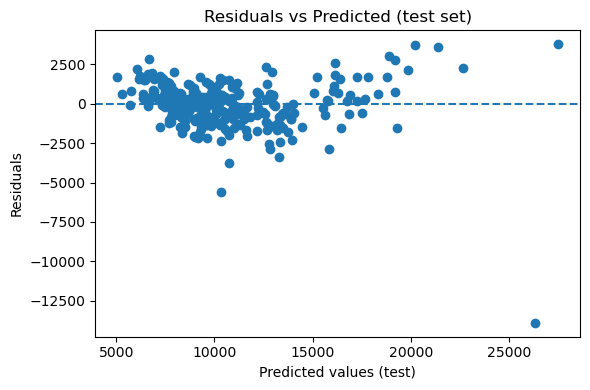

In [16]:
residuals = y_test - y_pred_test
plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted values (test)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (test set)")
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=[possible_target])  
y = df[possible_target]


X = pd.get_dummies(X, drop_first=True)

# Fill missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1148, 11) (1148,)
Testing set shape: (288, 11) (288,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  

# Model 1: All features
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

print("Model 1 - All Features")
print("R2 Score:", r2_score(y_test, y_pred1))
# Calculate RMSE manually by taking the square root of MSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))  

# Coefficients
coef_df1 = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model1.coef_
}).sort_values("Coefficient", key=lambda s: abs(s), ascending=False)

coef_df1.head(10)

Model 1 - All Features
R2 Score: 0.8348888040611082
RMSE: 1484.2654153296514


,Feature,Coefficient
10,Fuel_Type_Petrol,1370.808910
7,Gears,551.600710
3,Automatic,148.830927
0,Age_08_04,-120.830458
9,Fuel_Type_Diesel,-68.548757
5,Doors,-60.310974
8,Weight,25.884958
2,HP,14.039479
4,cc,-0.030372
1,KM,-0.016231


In [22]:
X_train.dtypes[X_train.dtypes == "object"]


Series([], dtype: object)

In [23]:
import statsmodels.api as sm

# Add constant column for intercept
X_train_sm = sm.add_constant(X_train)

# Convert to numpy arrays of float
X_train_sm = np.asarray(X_train_sm, dtype=float)
y_train_num = np.asarray(y_train, dtype=float)

# Fit OLS
ols_model = sm.OLS(y_train_num, X_train_sm).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:38:10   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -120.8305      2.887    -41.859      0.0

In [25]:
# Get parameter values as a numpy array
params = ols_model.params

# Build DataFrame with matching index
coef_summary = pd.DataFrame({
    "Feature": range(len(params)),  # temporary numeric index
    "Coefficient": params
})

coef_summary.head(10)


,Feature,Coefficient
0,0,-120.830458
1,1,-0.016231
2,2,14.039479
3,3,148.830927
4,4,-0.030372
5,5,-60.310974
6,6,-3563.846498
7,7,551.600710
8,8,25.884958
9,9,-68.548757


In [26]:
import statsmodels.api as sm

# Add constant while keeping column names
X_train_sm = sm.add_constant(X_train)

# Convert to float but keep DataFrame (not raw numpy array)
X_train_sm = X_train_sm.astype(float)
y_train_num = y_train.astype(float)

# Fit OLS with named columns
ols_model = sm.OLS(y_train_num, X_train_sm).fit()

# Build coefficient summary with feature names
coef_summary = pd.DataFrame({
    "Feature": X_train_sm.columns,
    "Coefficient": ols_model.params
})

coef_summary.head(10)


,Feature,Coefficient
Age_08_04,Age_08_04,-120.830458
KM,KM,-0.016231
HP,HP,14.039479
Automatic,Automatic,148.830927
cc,cc,-0.030372
Doors,Doors,-60.310974
Cylinders,Cylinders,-3563.846498
Gears,Gears,551.600710
Weight,Weight,25.884958
Fuel_Type_Diesel,Fuel_Type_Diesel,-68.548757


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model 1: All features
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

print("Model 1 - All Features")
print("R2 Score:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

# Coefficients
coef_df1 = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model1.coef_
}).sort_values("Coefficient", key=lambda s: abs(s), ascending=False)

coef_df1.head(10)


Model 1 - All Features
R2 Score: 0.8348888040611082
RMSE: 1484.2654153296514


,Feature,Coefficient
10,Fuel_Type_Petrol,1370.808910
7,Gears,551.600710
3,Automatic,148.830927
0,Age_08_04,-120.830458
9,Fuel_Type_Diesel,-68.548757
5,Doors,-60.310974
8,Weight,25.884958
2,HP,14.039479
4,cc,-0.030372
1,KM,-0.016231


In [31]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# -------------------
# Model 1: All Features
# -------------------
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# -------------------
# Model 2: Significant Features (adjust feature list as per your OLS results)
# -------------------
significant_features = ['Age_08_04','KM','HP','Weight']  # <-- update based on your dataset
X_train2 = X_train[significant_features]
X_test2 = X_test[significant_features]

model2 = LinearRegression()
model2.fit(X_train2, y_train)
y_pred2 = model2.predict(X_test2)

# -------------------
# Model 3: Ridge Regression
# -------------------
model3 = Ridge(alpha=10)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

# -------------------
# Evaluation Metrics
# -------------------
metrics = pd.DataFrame({
    "Model": ["All Features (OLS)", "Significant Features", "Ridge Regression"],
    "R2 Score": [
        r2_score(y_test, y_pred1),
        r2_score(y_test, y_pred2),
        r2_score(y_test, y_pred3)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred1)),
        np.sqrt(mean_squared_error(y_test, y_pred2)),
        np.sqrt(mean_squared_error(y_test, y_pred3))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred1),
        mean_absolute_error(y_test, y_pred2),
        mean_absolute_error(y_test, y_pred3)
    ]
})

metrics


,Model,R2 Score,RMSE,MAE
0,All Features (OLS),0.834889,1484.265415,990.887274
1,Significant Features,0.850607,1411.850209,1001.201747
2,Ridge Regression,0.837582,1472.110551,990.127381


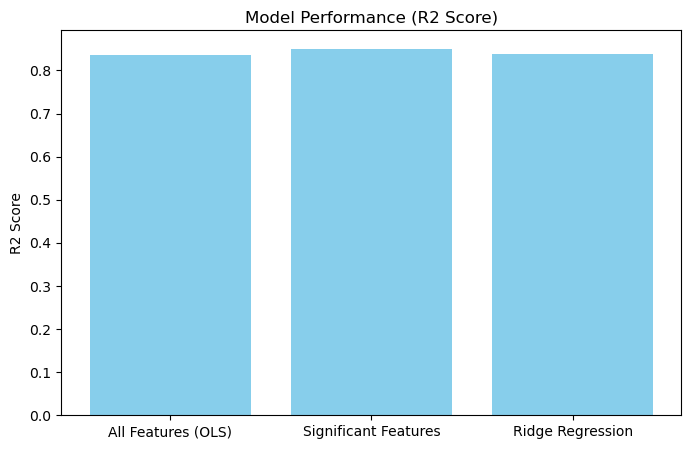

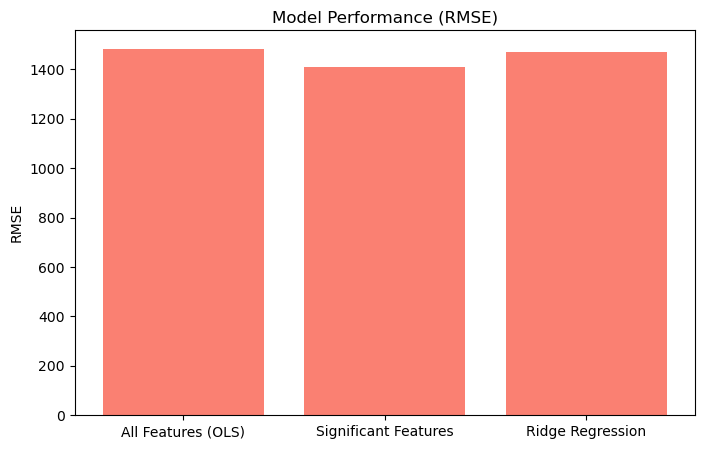

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(metrics["Model"], metrics["R2 Score"], color="skyblue")
plt.ylabel("R2 Score")
plt.title("Model Performance (R2 Score)")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(metrics["Model"], metrics["RMSE"], color="salmon")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()


In [33]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


lasso = Lasso(alpha=0.01, max_iter=10000)  # alpha tuned, can try other values
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


metrics_lasso_ridge = pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression"],
    "R2 Score": [
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso)
    ]
})

metrics_lasso_ridge


,Model,R2 Score,RMSE,MAE
0,Ridge Regression,0.837582,1472.110551,990.127381
1,Lasso Regression,0.834895,1484.239329,990.887948


Normalization rescales the values of a feature into a fixed range, usually between 0 and 1, using methods such as min-max scaling. This is especially helpful when the features have very different ranges, as it ensures that no variable dominates the learning process due to its scale.

Standardization, on the other hand, transforms the data to have a mean of zero and a standard deviation of one (z-score scaling). Unlike normalization, standardization does not constrain values within a fixed range but instead centers and scales the data based on distribution. Both techniques are particularly useful for algorithms that are sensitive to feature scales, such as logistic regression, k-nearest neighbors, and neural networks, as they lead to faster convergence during training and more accurate results.

In multiple linear regression, one common challenge is multicollinearity, which occurs when independent variables are highly correlated with each other. This can lead to unstable coefficient estimates, inflated standard errors, and difficulty in interpreting the model. Several techniques can be used to address multicollinearity.

One method is to remove or drop one of the highly correlated variables, especially if it contributes little additional information. Another approach is to use Principal Component Analysis (PCA) or other dimensionality reduction techniques to combine correlated features into fewer independent components. Additionally, regularization methods such as Ridge regression (L2 regularization) can help reduce the impact of multicollinearity by shrinking coefficient values. Detecting multicollinearity using metrics like the Variance Inflation Factor (VIF) is also an important step before applying these remedies. By addressing multicollinearity, the regression model becomes more reliable, interpretable, and robust in predicting outcomes.